# 06 - Multimodal Integration

This notebook implements multimodal models combining tabular, text, spatial, and image features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add src to path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "..")))

# Import multimodal models
from src.models.multimodal import MultimodalModel, compare_modalities, create_modality_analysis_report

# Set up plotting
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

⚠️  PyTorch not available. Neural network models will be disabled.
⚠️  PyTorch not available. CNN features will be disabled.


## Load Data

In [2]:
# Load the data with all features
base_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
data_path = os.path.join(base_path, "data", "processed", "features", "listings_encoded_clean.csv")

df = pd.read_csv(data_path)
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.head()

Dataset shape: (7096, 132)
Columns: ['id', 'scrape_id', 'host_id', 'host_since', 'host_location', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'availability_eoy', 'number_of_reviews_ly', 'estimated_occupancy_l365d', 'estimated_revenue_l365d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_boo

,id,scrape_id,host_id,host_since,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,...,amenity_coffee_maker,amenity_refrigerator,amenities_count,last_scraped_2025-03-19,last_scraped_2025-03-20,source_city scrape,source_previous scrape,has_availability_t,calendar_last_scraped_2025-03-19,calendar_last_scraped_2025-03-20
0,97945,0.0,517685,18,184,1.0,0.00,0,2,4,...,1,1,38,True,False,True,False,True,True,False
1,114695,0.0,581737,20,184,1.0,0.95,1,3,3,...,1,1,31,True,False,True,False,True,True,False
2,127383,0.0,630556,22,184,0.8,0.88,0,2,2,...,1,1,34,False,True,False,True,True,False,True
3,159634,0.0,765694,24,184,1.0,1.00,0,1,1,...,1,1,56,False,True,False,True,True,False,True
4,170154,0.0,108297,5,184,1.0,1.00,1,1,1,...,1,1,42,False,True,True,False,True,False,True


## Check Data Quality

In [3]:
# Check for missing values
print("Missing values:")
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])

# Remove rows with missing values
df_clean = df.dropna()
print(f"\nShape after removing missing values: {df_clean.shape}")

# Check target variable
print(f"\nPrice statistics:")
print(df_clean['price'].describe())

Missing values:
Series([], dtype: int64)

Shape after removing missing values: (7096, 132)

Price statistics:
count    7.096000e+03
mean     4.005314e-17
std      1.000070e+00
min     -3.984596e-01
25%     -1.770995e-01
50%     -1.217595e-01
75%     -5.412168e-02
max      3.429666e+01
Name: price, dtype: float64


## Compare Different Modality Combinations

In [4]:
# Compare different modality combinations
print("🔍 Comparing different modality combinations...")
modality_results = compare_modalities(df_clean, target_col='price')

# Create comparison report
comparison_df = create_modality_analysis_report(modality_results)
print("\nModality Comparison Results:")
print(comparison_df)

🔍 Comparing different modality combinations...
🔍 Comparing different modality combinations...

--- Testing Tabular Only ---
🚀 Training multimodal model...
🚀 Starting multimodal feature extraction...
1. Encoding categorical features...
🚀 Starting categorical feature encoding...

1. Encoding host features...
  ✅ host_is_superhost: ensured binary values (0/1)
  ✅ host_has_profile_pic: ensured binary values (0/1)
  ✅ host_identity_verified: ensured binary values (0/1)
  ✅ instant_bookable: ensured binary values (0/1)
  ✅ host_response_time: already encoded
  ✅ host_verifications: already encoded
  ✅ host_response_rate: ensured values in [0,1] range
  ✅ host_acceptance_rate: ensured values in [0,1] range

2. Encoding property features...

3. Encoding neighborhood features...
⚠️  neighbourhood_cleansed column not found

4. Extracting amenities features...
Extracting features from amenities...
  ⚠️  amenities is already numeric (count), skipping amenity extraction

5. Encoding low cardinality

## Visualize Modality Comparison

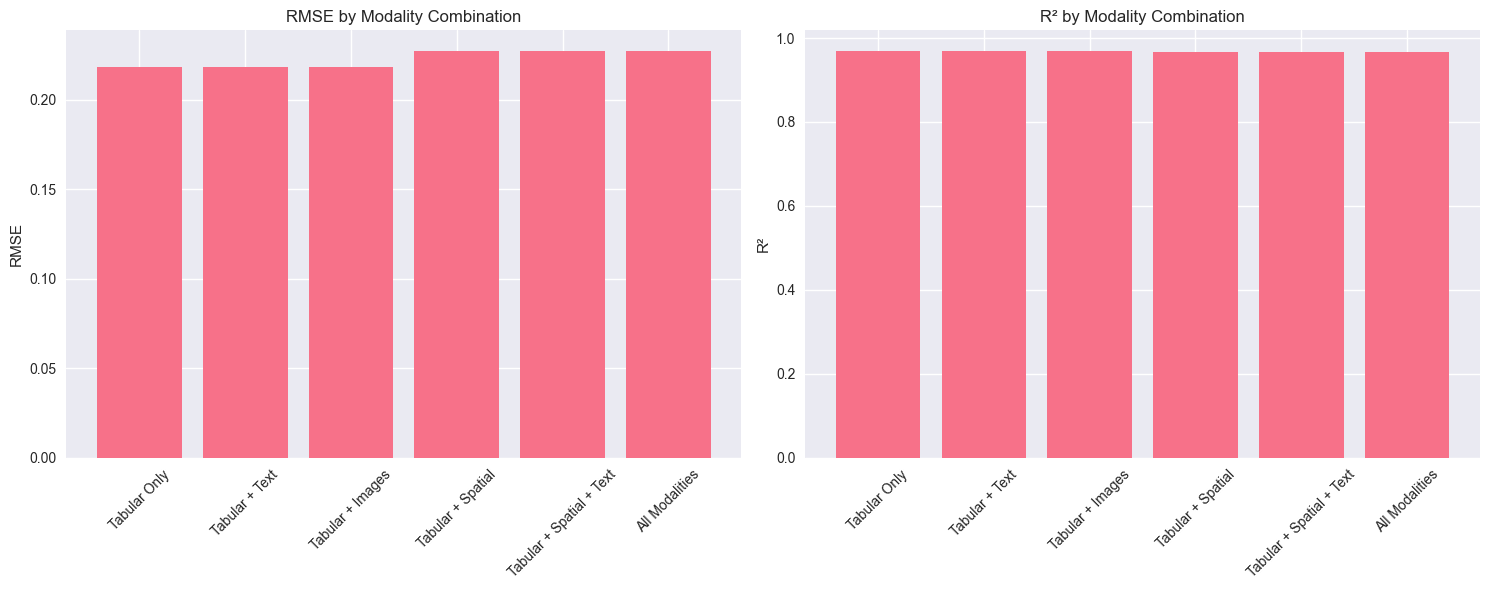

In [5]:
# Plot modality comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# RMSE comparison
ax1.bar(comparison_df['Modality'], comparison_df['RMSE'])
ax1.set_title('RMSE by Modality Combination')
ax1.set_ylabel('RMSE')
ax1.tick_params(axis='x', rotation=45)

# R² comparison
ax2.bar(comparison_df['Modality'], comparison_df['R²'])
ax2.set_title('R² by Modality Combination')
ax2.set_ylabel('R²')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Train Full Multimodal Model

In [6]:
# Train the full multimodal model with all modalities
print("🚀 Training full multimodal model...")
multimodal_model = MultimodalModel(
    use_images=True,  # Use image features
    use_cnn=False,    # Don't use CNN (faster)
    use_spatial=True, # Use spatial features
    use_text=True     # Use text features
)

# Train the model
results = multimodal_model.train(
    df_clean, 
    target_col='price',
    test_size=0.2,
    val_size=0.2,
    train_neural=True  # Also train neural network
)

🚀 Training full multimodal model...
🚀 Training multimodal model...
🚀 Starting multimodal feature extraction...
1. Encoding categorical features...
🚀 Starting categorical feature encoding...

1. Encoding host features...
  ✅ host_is_superhost: ensured binary values (0/1)
  ✅ host_has_profile_pic: ensured binary values (0/1)
  ✅ host_identity_verified: ensured binary values (0/1)
  ✅ instant_bookable: ensured binary values (0/1)
  ✅ host_response_time: already encoded
  ✅ host_verifications: already encoded
  ✅ host_response_rate: ensured values in [0,1] range
  ✅ host_acceptance_rate: ensured values in [0,1] range

2. Encoding property features...

3. Encoding neighborhood features...
⚠️  neighbourhood_cleansed column not found

4. Extracting amenities features...
Extracting features from amenities...
  ⚠️  amenities is already numeric (count), skipping amenity extraction

5. Encoding low cardinality categorical variables...
Encoding 0 low cardinality categorical variables...

6. Encodi

## Analyze Results

In [7]:
# Analyze ensemble results
ensemble_results = results['ensemble']
print("=== ENSEMBLE MODEL RESULTS ===")
print(f"Ensemble RMSE: {ensemble_results['ensemble']['rmse']:.2f}")
print(f"Ensemble R²: {ensemble_results['ensemble']['r2']:.3f}")
print(f"Ensemble MAE: {ensemble_results['ensemble']['mae']:.2f}")

print("\nIndividual Model Performance:")
for model_name, metrics in ensemble_results.items():
    if model_name != 'ensemble':
        print(f"  {model_name}: RMSE={metrics['rmse']:.2f}, R²={metrics['r2']:.3f}")

# Neural network results
if results['neural']:
    print("\n=== NEURAL NETWORK RESULTS ===")
    neural_results = results['neural']
    print(f"Neural Network RMSE: {neural_results['rmse']:.2f}")
    print(f"Neural Network R²: {neural_results['r2']:.3f}")
    print(f"Neural Network MAE: {neural_results['mae']:.2f}")

=== ENSEMBLE MODEL RESULTS ===
Ensemble RMSE: 0.23
Ensemble R²: 0.967
Ensemble MAE: 0.02

Individual Model Performance:
  linear: RMSE=0.48, R²=0.851
  ridge: RMSE=0.48, R²=0.851
  lasso: RMSE=0.53, R²=0.819
  rf: RMSE=0.23, R²=0.967
  gbm: RMSE=0.23, R²=0.966
